<a href="https://colab.research.google.com/github/eunterko/MAT421/blob/main/ModuleB_Section_17_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 17: Interpolation (part 2)**

# *17.4 Lagrange Polynomial Interpolation*

The next interpolation method is Lagrange polynomial interpolation. While cubic spline interpolation involved defining several piecewise cubic polynomials, Lagrange polynomial interpolation involves defining one polynomial that connects all the data points: the Lagrange polynomial L(x). We define this polynomial as

In [ ]:
# L(x) = sum_(i=1)^n y_i * P_i(x)

where P_i(x) are the Lagrange basis polynomials 

In [ ]:
# P_i(x) = prod_(j=1, j!=i)^n (x - x_j) / (x_i - x_j)

Like previous interpolation methods, Python has the function lagrange(x, y) in scipy. Using this function to solve the problem statement (and using the same data set from the previous sections), we would have

In [2]:
from scipy.interpolate import lagrange

x = [1,2,3,4]
y = [1,4,2,3]
f = lagrange(x,y)
L = f(2.5)
print(L)

3.124999999999993


Graphing our Lagrange polynomial interpolation, we have

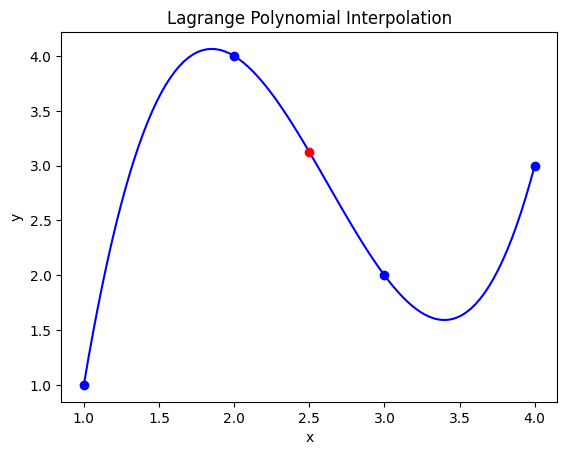

In [4]:
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

x = [1,2,3,4]
y = [1,4,2,3]
f = lagrange(x,y)
x_new = np.linspace(1, 4, 100)
y_new = f(x_new)
plt.plot(x_new,y_new,'b',x,y,'bo',2.5,3.125,'ro') 
plt.title('Lagrange Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# *17.5 Newton’s Polynomial Interpolation*

The next interpolation method is similar to Lagrange polynomial interpolation, in that it defines a single polynomial that connects all the data points: Newton's polynomial interpolation. The benefit of Newton's polynomial interpolation is that all the coefficients of the polynomial f(x) can be determined by a relatively simple, iterative process. The polynomial takes the form

In [ ]:
# f(x) = sum_(i=0)^n a_i * n_i(x)

where

In [ ]:
# n_i(x) = prod_(j=0)^(i-1) x - x_j

The process to determine the coefficients begins as such: we know that, for every (x_i, y_i), f(x_i) = y_i. Therefore, for x_0,

In [ ]:
# f(x_0) = a_0 = y_0

and for x_1,

In [ ]:
# f(x_1) = a_0 + a_1 * (x_1 - x_0) = y_1

which can be rearranged to find

In [ ]:
# a_1 = (y_1 - y_0) / (x_1 - x_0)

Continuing this process, we can create a table of the divided differences and find relations for all a_i, thus fully defining the polynomial f(x). Since there is no defined function for this interpolation process, let's write a few functions to solve the problem statement and graph the interpolation function.

3.125


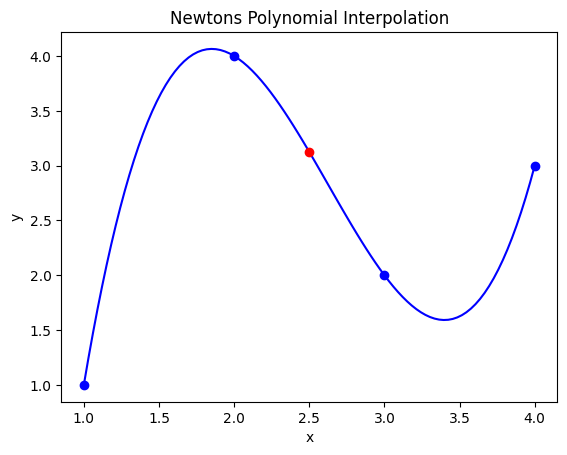

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x,y):

    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(0,n-j):
            coef[i][j] = \
           (coef[i+1][j-1]-coef[i][j-1])/(x[i+j]-x[i])
            
    return coef
    
def newton_poly(coef,x_data,x):

  n = len(x_data)-1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k]+(x-x_data[n-k])*p
  return p

x = [1,2,3,4]
y = [1,4,2,3]

a_i = divided_diff(x,y)[0,:]
x_new = np.linspace(1,4,100)
y_new = newton_poly(a_i,x,x_new)

print(newton_poly(a_i,x,2.5))

plt.plot(x_new,y_new,'b',x,y,'bo',2.5,3.125,'ro') 
plt.title('Newtons Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As we have seen throughout this chapter, there are a variety of interpolation methods that offer different strengths and weaknesses, depending on the situation in which you might need to use them.